# HW6

Cindy Wu (ccw2145)<br>
Sharon Tsao (sjt2141)


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
from keras.layers import Dropout

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
np.random.RandomState(seed=0)
import warnings; warnings.simplefilter('ignore')

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Task 1 [10 Points]
Run a multilayer perceptron (feed forward neural network) with two hidden layers and rectified linear nonlinearities on the iris data
set using the keras  Sequential interface . Include code for model selection using GridSearchCV and evaluation on an independent test-set.

In [15]:
# Load data
data = load_iris()

# split data for training
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], stratify = data['target'], random_state=0)

# Convert labels to categorical one-hot encoding
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [16]:
print(X_train.shape,X_test.shape)
print(y_train.shape)

(112, 4) (38, 4)
(112, 3)


In [98]:
def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_dim=4),
        Activation('relu'),
        Dense(hidden_size),
        Activation('relu'),
        Dense(3),
        Activation('softmax')
    ])
       
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [99]:
clf = KerasClassifier(make_model)

param_grid = {'epochs': [2, 10, 20], 
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid = param_grid, cv=StratifiedShuffleSplit(n_splits=1, test_size=0.3))

In [100]:
grid.fit(X_train, y_train)

Epoch 1/2
78/78 [==============================] - 7s 87ms/step - loss: 1.5407 - acc: 0.3333
Epoch 2/2
78/78 [==============================] - 0s 215us/step
Epoch 1/2
78/78 [==============================] - 5s 58ms/step - loss: 2.0728 - acc: 0.3333
Epoch 2/2
78/78 [==============================] - 0s 193us/step
Epoch 1/2
78/78 [==============================] - 5s 64ms/step - loss: 1.0619 - acc: 0.3333
Epoch 2/2
78/78 [==============================] - 0s 247us/step
Epoch 1/10
78/78 [==============================] - 6s 73ms/step - loss: 1.3427 - acc: 0.0000e+00
Epoch 2/10
78/78 [==============================] - 0s 241us/step - loss: 1.2483 - acc: 0.0256
Epoch 3/10
78/78 [==============================] - 0s 242us/step - loss: 1.1809 - acc: 0.1154
Epoch 4/10
78/78 [==============================] - 0s 210us/step - loss: 1.1393 - acc: 0.0897
Epoch 5/10
78/78 [==============================] - 0s 223us/step - loss: 1.1153 - acc: 0.2692
Epoch 6/10
78/78 [==============================

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=1, random_state=None, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x1a661fcb70>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epochs': [2, 10, 20], 'hidden_size': [32, 64, 256]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
print("best params: {}".format(grid.best_params_))
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_hidden_size", "param_epochs"],
                values=['mean_train_score', "mean_test_score"])

best params: {'epochs': 10, 'hidden_size': 256}


mean_test_score  mean_train_score
param_hidden_size param_epochs                                   
32                2                    0.500000              0.58
                  10                   0.666667              0.67
                  20                   0.916667              0.98
64                2                    0.416667              0.39
                  10                   0.666667              0.68
                  20                   0.833333              0.86
256               2                    0.666667              0.66
                  10                   1.000000              0.97
                  20                   0.916667              0.98

In [93]:
# best model with best mean train score 
model = make_model(hidden_size = 256)

history = model.fit(X_train, y_train,
          epochs= 20,
          validation_split=.1)

Train on 100 samples, validate on 12 samples
Epoch 1/20
100/100 [==============================] - 7s 71ms/step - loss: 1.0463 - acc: 0.4300 - val_loss: 0.8717 - val_acc: 0.6667
Epoch 2/20
100/100 [==============================] - 0s 270us/step - loss: 0.7971 - acc: 0.8400 - val_loss: 0.7091 - val_acc: 0.5833
Epoch 3/20
100/100 [==============================] - 0s 249us/step - loss: 0.6664 - acc: 0.8400 - val_loss: 0.6117 - val_acc: 0.6667
Epoch 4/20
100/100 [==============================] - 0s 312us/step - loss: 0.5945 - acc: 0.6700 - val_loss: 0.5500 - val_acc: 0.8333
Epoch 5/20
100/100 [==============================] - 0s 279us/step - loss: 0.5400 - acc: 0.7400 - val_loss: 0.6487 - val_acc: 0.5833
Epoch 6/20
100/100 [==============================] - 0s 314us/step - loss: 0.4987 - acc: 0.7400 - val_loss: 0.4757 - val_acc: 0.8333
Epoch 7/20
100/100 [==============================] - 0s 318us/step - loss: 0.4221 - acc: 0.8200 - val_loss: 0.4459 - val_acc: 0.8333
Epoch 8/20
100/100

In [94]:
score = model.evaluate(X_test, y_test)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

38/38 [==============================] - 0s 293us/step
Test loss: 0.154
Test Accuracy: 0.974


In [95]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

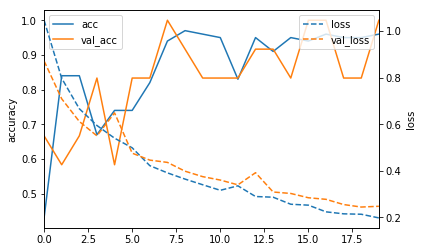

In [96]:
plot_history(history)
plt.show()

## Task 2 [30 Points]
Train a multilayer perceptron on the MNIST dataset using the traditional train/test split. Use an separate 10000 samples (from the training set) for model selection and to compute learning curves. Compare a “vanilla” model with a model using drop-out. Visualize learning curves for all models. As an estimate, you should expect each model to take less than 30 minutes to train on a CPU.

In [44]:
# Load mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [56]:
X_train.reshape(60000, 784).astype('float32').shape
plt.imshow(X_train.reshape(60000, 784).astype('float32')[1]/255

(60000, 784)

In [23]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [65]:
#taking 10000 out of 60000 samples
train = np.concatenate((X_train, y_train), axis=1, out=None)
train_sample = train[np.random.randint(train.shape[0], size=10000), :]
X_train_sample, y_train_sample =np.split(train_sample, [784], axis = 1)

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_train_sample.shape)
print(y_train_sample.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [76]:
# Vanilla

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax')])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train_sample, y_train_sample, batch_size=128, epochs=10, verbose=1, 
          validation_split=.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 0s 52us/step - loss: 0.0322 - acc: 0.9920 - val_loss: 0.0366 - val_acc: 0.9940
Epoch 2/10
9000/9000 [==============================] - 0s 18us/step - loss: 0.0227 - acc: 0.9956 - val_loss: 0.0331 - val_acc: 0.9940
Epoch 3/10
9000/9000 [==============================] - 0s 22us/step - loss: 0.0184 - acc: 0.9970 - val_loss: 0.0374 - val_acc: 0.9910
Epoch 4/10
9000/9000 [==============================] - 0s 26us/step - loss: 0.0154 - acc: 0.9983 - val_loss: 0.0383 - val_acc: 0.9900
Epoch 5/10
9000/9000 [==============================] - 0s 23us/step - loss: 0.0143 - acc: 0.9983 - val_loss: 0.0380 - val_acc: 0.9880
Epoch 6/10
9000/9000 [==============================] - 0s 21us/step - loss: 0.0117 - acc: 0.9993 - val_loss: 0.0393 - val_acc: 0.9900
Epoch 7/10
9000/9000 [==============================] - 0s 21us/step - loss: 0.0103 - acc: 0.9994 - val_loss: 0.0413 - val_acc: 0.9880
Epoch 8

In [91]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.142
Test Accuracy: 0.961


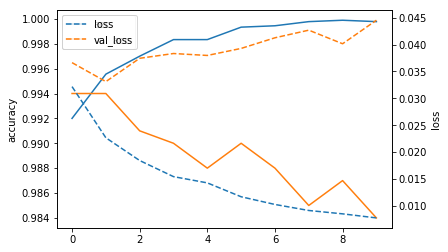

In [90]:
plot_history(history)
plt.show()

In [67]:
# With Dropout
model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train_sample, y_train_sample, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/20
9000/9000 [==============================] - 3s 352us/step - loss: 0.6526 - acc: 0.7874 - val_loss: 0.2817 - val_acc: 0.9130
Epoch 2/20
9000/9000 [==============================] - 3s 304us/step - loss: 0.2644 - acc: 0.9170 - val_loss: 0.2154 - val_acc: 0.9320
Epoch 3/20
9000/9000 [==============================] - 3s 322us/step - loss: 0.1817 - acc: 0.9434 - val_loss: 0.1937 - val_acc: 0.9390
Epoch 4/20
9000/9000 [==============================] - 3s 323us/step - loss: 0.1381 - acc: 0.9568 - val_loss: 0.1726 - val_acc: 0.9540
Epoch 5/20
9000/9000 [==============================] - 3s 316us/step - loss: 0.1098 - acc: 0.9644 - val_loss: 0.1602 - val_acc: 0.9540
Epoch 6/20
9000/9000 [==============================] - 3s 310us/step - loss: 0.0925 - acc: 0.9707 - val_loss: 0.1360 - val_acc: 0.9600
Epoch 7/20
9000/9000 [==============================] - 3s 308us/step - loss: 0.0778 - acc: 0.9753 - val_loss: 0.1519 - val_acc: 0.9580


In [71]:
score = model_dropout.evaluate(X_test, y_test)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))


10000/10000 [==============================] - 1s 103us/step
Test loss: 0.142
Test Accuracy: 0.969


In [21]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

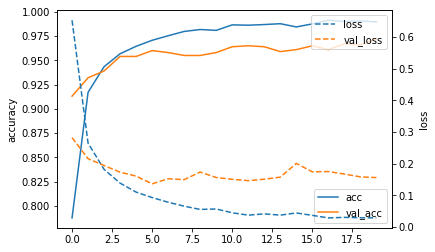

In [74]:
plot_history(history_dropout)
plt.show()

## Task 3 [30 Points]
Train a convolutional neural network on the  SVHN dataset  in format 2 (single digit classification). You should achieve at least 85% test-set accuracy with a base model. Also build a model using batch normalization. Your final accuracy will be included in the grading. You can compare against other approaches  reported here  if you’re curious. You are not required to use the unlabeled data. On a CPU, each epoch (pass through the training set) can take up to ~40 minutes.
Hint :  Make sure you are doing the reshape for the training set correctly. A direct reshape might give you garbled images. Display an image after reshaping to make sure they are correct.

In [3]:
import scipy.io
from keras.layers import Conv2D, MaxPooling2D, Flatten,BatchNormalization

Using TensorFlow backend.


In [6]:
train = scipy.io.loadmat('/Users/viva2.0/Downloads/train_32x32.mat')
test = scipy.io.loadmat('/Users/viva2.0/Downloads/test_32x32.mat')
X_train, y_train = train['X'], train['y']
X_test, y_test = test['X'], test['y']

img_rows, img_cols = 32, 32

num_class = len(np.unique(train['y']))
input_shape = (img_rows, img_cols, 3)
print (X_train.shape, y_train.shape)

(32, 32, 3, 73257) (73257, 1)


(73257, 32, 32, 3) (73257, 1)


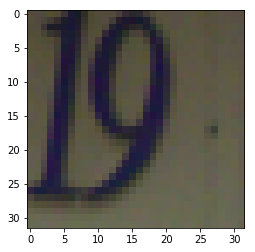

In [7]:
X_train = X_train.T.swapaxes(1,3)
X_test = X_test.T.swapaxes(1,3)
print (X_train.shape, y_train.shape)
plt.imshow(X_train[1])

In [8]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = keras.utils.to_categorical(y_train.ravel())[:,1:]
y_test = keras.utils.to_categorical(y_test.ravel())[:,1:]  

In [17]:
# Base model
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(4, 4),
                 input_shape = input_shape,
                 activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (4, 4)))
cnn.add(Activation("relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_class, activation='softmax'))

In [18]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
activation_6 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                51264     
__________

In [19]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn = cnn.fit(X_train, y_train,
                      batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 65931 samples, validate on 7326 samples
Epoch 1/10
65931/65931 [==============================] - 108s 2ms/step - loss: 1.1948 - acc: 0.6175 - val_loss: 0.6240 - val_acc: 0.8247
Epoch 2/10
65931/65931 [==============================] - 132s 2ms/step - loss: 0.5808 - acc: 0.8391 - val_loss: 0.5274 - val_acc: 0.8545
Epoch 3/10
65931/65931 [==============================] - 101s 2ms/step - loss: 0.5057 - acc: 0.8587 - val_loss: 0.4924 - val_acc: 0.8655
Epoch 4/10
65931/65931 [==============================] - 98s 1ms/step - loss: 0.4591 - acc: 0.8714 - val_loss: 0.4719 - val_acc: 0.8661
Epoch 5/10
65931/65931 [==============================] - 85s 1ms/step - loss: 0.4242 - acc: 0.8792 - val_loss: 0.4416 - val_acc: 0.8761
Epoch 6/10
65931/65931 [==============================] - 98s 1ms/step - loss: 0.3949 - acc: 0.8861 - val_loss: 0.4239 - val_acc: 0.8771
Epoch 7/10
65931/65931 [==============================] - 103s 2ms/step - loss: 0.3747 - acc: 0.8919 - val_loss: 0.4024 - val_

In [24]:
score = cnn.evaluate(X_test, y_test)

26032/26032 [==============================] - 18s 703us/step
Test loss: 0.469
Test Accuracy: 0.866


Test loss: 0.469
Test Accuracy: 0.866


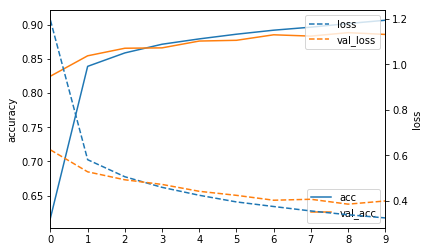

In [25]:
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))
plot_history(history_cnn)
plt.show()

In [29]:
# With Batch Normalization
cnn_bn = Sequential()
cnn_bn.add(Conv2D(32, kernel_size=(4, 4),
                 input_shape = input_shape,
                 activation="relu"))
cnn_bn.add(BatchNormalization())
cnn_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_bn.add(Conv2D(32, (4, 4)))
cnn_bn.add(Activation("relu"))
cnn_bn.add(BatchNormalization())
cnn_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_bn.add(Flatten())
cnn_bn.add(Dense(64, activation='relu'))
cnn_bn.add(Dense(num_class, activation='softmax'))

In [30]:
cnn_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn_bn = cnn_bn.fit(X_train, y_train,
                      batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 65931 samples, validate on 7326 samples
Epoch 1/10
65931/65931 [==============================] - 229s 3ms/step - loss: 0.7572 - acc: 0.7687 - val_loss: 0.6570 - val_acc: 0.8047
Epoch 2/10
65931/65931 [==============================] - 233s 4ms/step - loss: 0.4221 - acc: 0.8746 - val_loss: 0.4858 - val_acc: 0.8471
Epoch 3/10
65931/65931 [==============================] - 236s 4ms/step - loss: 0.3611 - acc: 0.8923 - val_loss: 0.4465 - val_acc: 0.8665
Epoch 4/10
65931/65931 [==============================] - 233s 4ms/step - loss: 0.3136 - acc: 0.9058 - val_loss: 0.4370 - val_acc: 0.8702
Epoch 5/10
65931/65931 [==============================] - 234s 4ms/step - loss: 0.2846 - acc: 0.9163 - val_loss: 0.4117 - val_acc: 0.8795
Epoch 6/10
65931/65931 [==============================] - 337s 5ms/step - loss: 0.2619 - acc: 0.9222 - val_loss: 0.3645 - val_acc: 0.8945
Epoch 7/10
65931/65931 [==============================] - 265s 4ms/step - loss: 0.2367 - acc: 0.9300 - val_loss: 0.3533 - v

In [33]:
score = cnn_bn.evaluate(X_test, y_test)

26032/26032 [==============================] - 34s 1ms/step


Test loss: 0.461
Test Accuracy: 0.878


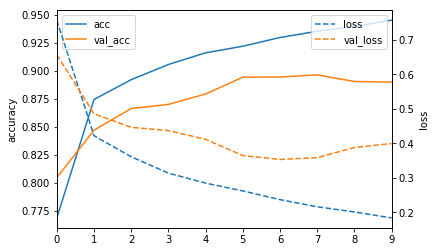

In [35]:
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))
plot_history(history_cnn_bn)
plt.show()

## Task 4 [30 points]
Load the weights of a pre-trained convolutional neural network included in keras, see https://keras.io/applications/ , and use it as feature extraction method to train a linear model or MLP on the pets dataset ( http://www.robots.ox.ac.uk/~vgg/data/pets/ ). You should achieve at least 70% accuracy. It’s recommended you store the extracted features on disk so you don’t have to recompute them for model selection.
We will be working with the 37 class classification task.
Hint : Make sure that you apply the same preprocessing to the images that was applied for training the model.

In [17]:
from keras.preprocessing import image
import glob
from keras import applications
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [18]:
# load ground truth
gt = pd.read_csv('/Users/sharontsao/Desktop/annotations/list.txt', skiprows=range(5), sep=' ')
image_id = gt.iloc[:,0]
y = np.array(gt.iloc[:,1])

print("Number of images in ground truth: {}".format(image_id.shape[0]))
print("Number of classes: {}".format(len(np.unique(y))))

Number of images in ground truth: 7349
Number of classes: 37


In [19]:
# load imges
from IPython.display import display 
from PIL import Image

path = "/Users/sharontsao/Desktop/images/"
image_list = [image.load_img(path+id+'.jpg',target_size=(400, 600)) for id in image_id]
X = np.array([image.img_to_array(img) for img in image_list])
X.shape

(7349, 400, 600, 3)

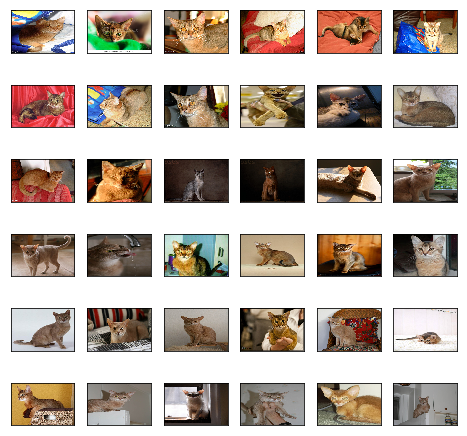

In [20]:
fig, axes = plt.subplots(6, 6, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
for img, ax in zip(image_list[:36], axes.ravel()):
    ax.imshow(img)

In [21]:
# build the VGG16 network

model = applications.VGG16(include_top=False, weights='imagenet')

In [22]:
# preprocessing for VGG16
import time
start_time = time.time()

num_images = X.shape[0]
X_pre = preprocess_input(X)
features = model.predict(X_pre)
print(X.shape)
print(features.shape)

features_ = features.reshape(num_images, -1)

elapsed_time = time.time() - start_time

(7349, 400, 600, 3)
(7349, 12, 18, 512)


In [24]:
# train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features_, y, stratify=y)

In [25]:
# logreg for classification
start_time2 = time.time()

#lr = LogisticRegressionCV().fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

confusion_matrix(y_test, lr.predict(X_test))

elapsed_time2 = time.time() - start_time2

1.0
0.8645266594124048
